In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import time
import networkx as nx
from src.environment import EnvironmentNetwork, Environment
from src.runner import Runner
from src.agent import NetworkAgent, Agent
from src.helpers import edges_to_remove_neighbourhood, what_neighbourhood, what_coordinates, what_informality
import random
import json

# Try to create network of agents without network X

In [5]:

data_folder = 'measurement/baseline/'

# load parameters
with open('parameters.json') as json_file:
    parameters = json.load(json_file)

# load neighbourhood data
with open('neighbourhood_data.json') as json_file:
    neighbourhood_data = json.load(json_file)

# load age data
age_distribution = pd.read_csv('age_dist.csv', sep=';', index_col=0)
age_distribution_per_ward = dict(age_distribution.transpose())

In [3]:
seed = 0

In [29]:
np.random.seed(seed)
random.seed(seed)

#self.parameters = parameters

# sort data
nbd_values = [x[1] for x in neighbourhood_data]
nbd_keys = [x[0] for x in neighbourhood_data]
population_per_neighbourhood = [x['Population'] for x in nbd_values]

# correct the population in neighbourhoods to be proportional to number of agents
correction_factor = sum(population_per_neighbourhood) / parameters["number_of_agents"]
corrected_populations = [round(x / correction_factor) for x in population_per_neighbourhood]

# only count neighbourhoods that then have an amount of people bigger than 0
indices_big_neighbourhoods = [i for i, x in enumerate(corrected_populations) if x > 0]
corrected_populations_final = [x for i, x in enumerate(corrected_populations) if x > 0]

In [7]:
### old method
# 1 create a cave network that has max nodes equal to the biggest neighbourhoods
# 2 find cliques and associate with neighbourhoods that are big enough
# 3 reduce the amount of nodes in each clique to reflect the size of the neighbourhood

### new method
# 1 create neighbourhoods based on amount of agents in model

In [14]:
agents = []

for num_agents, idx in zip(corrected_populations_final, indices_big_neighbourhoods):
    neighbourhood_list = []
    neighbourhood_code = neighbourhood_data[idx][0]
    coordinates = what_coordinates(neighbourhood_code, neighbourhood_data)
    informality = what_informality(neighbourhood_code, neighbourhood_data)
    
    age_categories = np.random.choice(age_distribution_per_ward[neighbourhood_code].index,
                                              size=num_agents,
                                              replace=True,
                                              p=age_distribution_per_ward[neighbourhood_code].values)
    
    # add agents to neighbourhood
    for a in range(num_agents):
        neighbourhood_list.append(Agent(a, 's', 
                                   parameters["probability_transmission"], 
                                   parameters["probability_susceptible"], 
                                   parameters["probability_to_travel"], 
                                   coordinates, 
                                   neighbourhood_code, 
                                   age_categories[a],
                                   informality,
                                   parameters['probability_critical'][age_categories[a]],
                                   parameters['probability_to_die'][age_categories[a]]
                                  ))
    # connect the neighbours based on density
    
    agents.append(neighbourhood_list)

In [22]:
len([y for x in agents for y in x])

441

In [33]:
from networkx.generators.community import LFR_benchmark_graph

In [83]:
n_nodes = 200
exp_degree_distr = 3
commu_size_distr = 1.5
frac_intra_community_edges = 0.1
average_degree = 5
min_community= 20
G = LFR_benchmark_graph(n_nodes, exp_degree_distr, commu_size_distr, frac_intra_community_edges, average_degree=average_degree, min_community=min_community, seed=10)

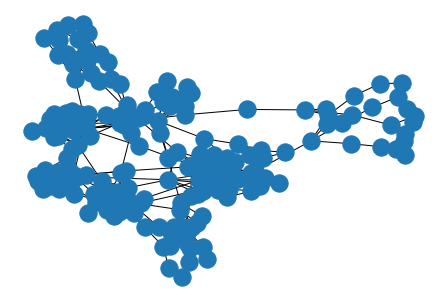

In [84]:
nx.draw(G)

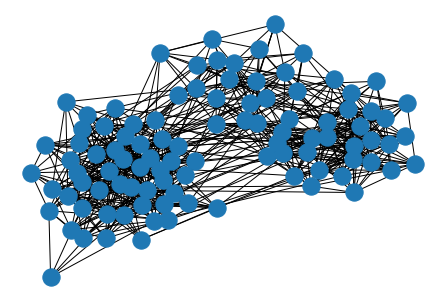

In [77]:
sizes = [50, 20, 30]
probs = [[0.25, 0.05, 0.02],[0.05, 0.35, 0.07],[0.02, 0.07, 0.40]]
G = nx.stochastic_block_model(sizes, probs, seed=0)
nx.draw(G)

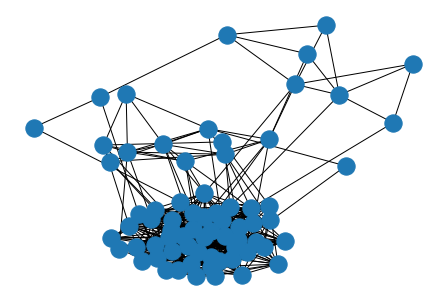

In [106]:
group_sizes = [50, 10, 10]

prob_edges_in_groups = 0.4

prob_edges_between_groups = 0.03

G = nx.random_partition_graph(group_sizes,prob_edges_in_groups,prob_edges_between_groups)
nx.draw(G)

In [107]:
nx.density(G)

0.22815734989648034

In [109]:
np.mean(nx.degree(G))

25.12142857142857

In [110]:
np.std(nx.degree(G))

17.894319871776894

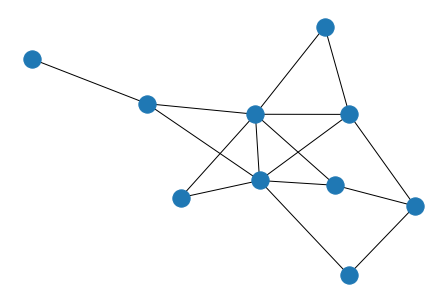

In [161]:
nodes = 10
new_edges = 2
G = nx.barabasi_albert_graph(nodes, new_edges, seed=0) 
nx.draw(G)

In [162]:
nx.density(G)

0.35555555555555557

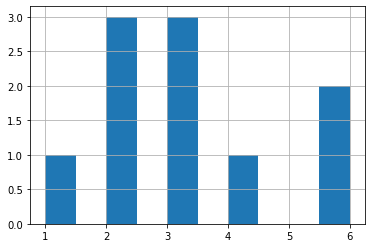

In [163]:
pd.Series([x[1] for x in nx.degree(G)]).hist()

In [164]:
np.median(nx.degree(G))

3.0

In [165]:
np.std(nx.degree(G))

2.4140215409146624

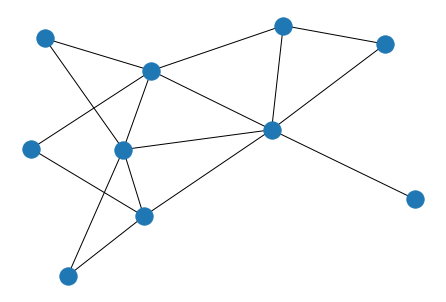

In [171]:
nodes = 10
new_edges = 2
G = nx.powerlaw_cluster_graph(nodes, new_edges, p=0.8, seed=0)
nx.draw(G)

In [172]:
nx.density(G)

0.35555555555555557

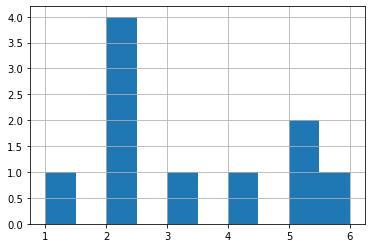

In [173]:
pd.Series([x[1] for x in nx.degree(G)]).hist()

In [174]:
np.median(nx.degree(G))

3.5

In [175]:
np.std(nx.degree(G))

2.4140215409146624